<a href="https://colab.research.google.com/github/Ramprashanth17/info6105-Data-Science/blob/main/AutoML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOML H2O ASSIGNMENT**

**Abstract**

Prediction of levels of obesity by using machine learning classification models and H2O autoML

Data collected from UCI Machine Learning Repository.

**About the Dataset**

Dietary, exercise and personal daily habits of individuals from Mexico, Peru and Columbia are recorded to build estimation of obesity levels.

Obesity Level will be used as the target (y) variable, which consists of 7 classes - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

There are 17 attributes in total related to individual habits that are likely to determine obesity levels, such as number of main meals, time using technology devices, gender and transportation used.

Details of the questions and possible answers collected for the data can be found in the link provided above.

Original dataset

Gender - Female/Male

age - Numeric value

height - Numeric value in meters

weight - Numeric value in kilograms

Has a family member suffered or suffers from overweight - Yes/No

Do you eat high caloric food frequently - Yes/No

Do you usually eat vegetables in your meals - Never/Sometimes/Always

How many main meals do you have daily - Between 1 y 2/Three/More than three

Do you eat any food between meals? No/Sometimes/Frequently/Always

Do you smoke? Yes/No

How much water do you drink daily? Less than a liter/Between 1 and 2 L/More than 2 L

Do you monitor the calories you eat daily - Yes/No

How often do you have physical activity? I do not have/1 or 2 days/2 or 4 days/4 or 5 days

How much time do you use technological devices such as cell phone, videogames, television, computer and others -
0–2 hours/3–5 hours/More than 5 hours

how often do you drink alcohol? - I do not drink/Sometimes/Frequently/Always

Which transportation do you usually use? Automobile/Motorbike/Bike/Public Transportation/Walking

**Exploratory Data Analysis**

The goal is to see the data,remove any duplicates or null values found and see the distribution of the data.

In [1]:
# Importing necessary libraries for the process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# storing the data to a dataframe for analysis
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# Checking for any missing values
null_values = df.isnull().sum()

# Checking for duplicate values
duplicate_values = df.duplicated().sum()

print(f"Number of null values in the dataframe is: \n {null_values}")
print(f"Number of duplicate values in the dataframe is: {duplicate_values}")

Number of null values in the dataframe is: 
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Number of duplicate values in the dataframe is: 24


The dataset doesn't have any null values. However, it does have 24 duplicate values


In [4]:
# Dropping the duplicated values
df = df.drop_duplicates()

df.duplicated().sum()

0

In [5]:
df.shape

(2087, 17)

**Importing H2O**

Import the h2o Python module and H2OAutoML class and initialize a local H2O cluster.

In [6]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=cf21217767782ce7f3e45e5f8e16d10571e73ead4d484eac7367c8b56382a82e
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [7]:
import glob, re
import numpy as np
import pandas as pd
from sklearn import *
from datetime import datetime
from xgboost import XGBRegressor
import h2o
from h2o.automl import H2OAutoML
#Installing H20

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvecxyn60
  JVM stdout: /tmp/tmpvecxyn60/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvecxyn60/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_h81nd4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [10]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
data.name = "data"
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<ipython-input-12-38a0025775d4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(), annot=True, cmap="Oranges"


<Axes: >

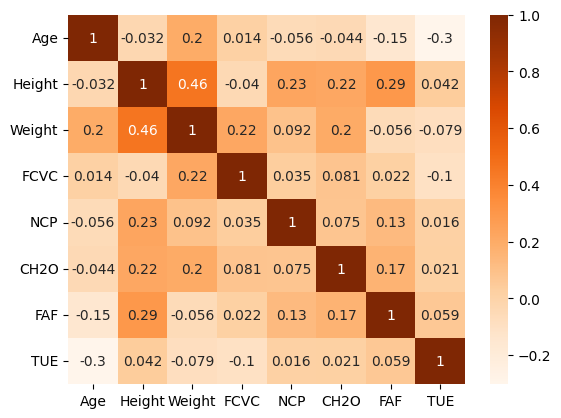

In [12]:
import seaborn as sns
sns.heatmap(
    df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes

In [13]:
data.corr().unstack().sort_values().drop_duplicates()
#checking correlation between variables

<ipython-input-13-34eef0e2a2a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().unstack().sort_values().drop_duplicates()


TUE     Age      -0.296931
FAF     Age      -0.144938
FCVC    TUE      -0.101135
TUE     Weight   -0.071561
Weight  FAF      -0.051436
Age     CH2O     -0.045304
NCP     Age      -0.043944
Height  FCVC     -0.038121
        Age      -0.025958
TUE     CH2O      0.011965
Age     FCVC      0.016291
FAF     FCVC      0.019939
NCP     TUE       0.036326
FCVC    NCP       0.042216
TUE     Height    0.051912
CH2O    NCP       0.057088
FAF     TUE       0.058562
FCVC    CH2O      0.068461
Weight  NCP       0.107469
NCP     FAF       0.129504
FAF     CH2O      0.167236
Weight  CH2O      0.200575
        Age       0.202560
CH2O    Height    0.213376
FCVC    Weight    0.216125
Height  NCP       0.243672
FAF     Height    0.294709
Height  Weight    0.463136
Age     Age       1.000000
dtype: float64

In [14]:
#Importing our dataset with H2O.
df = h2o.import_file('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
df.types

{'Gender': 'enum',
 'Age': 'real',
 'Height': 'real',
 'Weight': 'real',
 'family_history_with_overweight': 'enum',
 'FAVC': 'enum',
 'FCVC': 'real',
 'NCP': 'real',
 'CAEC': 'enum',
 'SMOKE': 'enum',
 'CH2O': 'real',
 'SCC': 'enum',
 'FAF': 'real',
 'TUE': 'real',
 'CALC': 'enum',
 'MTRANS': 'enum',
 'NObeyesdad': 'enum'}

In [16]:
df.describe()

Rows:2111
Cols:17

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
type,enum,real,real,real,enum,enum,real,real,enum,enum,real,enum,real,real,enum,enum,enum
mins,,14.0,1.45,39.0,,,1.0,1.0,,,1.0,,0.0,0.0,,,
mean,,24.312599908574136,1.7016773533870204,86.58605812648032,,,2.419043061582189,2.6856280497394596,,,2.0080114040738986,,1.0102976958787304,0.6578659237328283,,,
maxs,,61.0,1.98,173.0,,,3.0,4.0,,,3.0,,3.0,2.0,,,
sigma,,6.345968273732234,0.09330481986792,26.191171745204677,,,0.5339265785033,0.7780386488418612,,,0.6129534517968722,,0.8505924308366978,0.6089272596763782,,,
zeros,,0,0,0,,,0,0,,,0,,411,557,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.8,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [17]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [18]:
df_train

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
Male,29,1.62,53,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
Female,23,1.5,55,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
Male,24,1.78,64,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight
Male,22,1.72,68,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight
Female,21,1.72,80,yes,yes,2,3,Frequently,no,2,yes,2,1,Sometimes,Public_Transportation,Overweight_Level_II


In [19]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "NObeyesdad"
x = df.columns
x.remove(y)

In [20]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters.
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", though they are really good.
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [21]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which
#variable will it be using for the prediction purposes.
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
21:53:17.968: Project: AutoML_1_20240218_215317
21:53:17.969: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:53:17.981: Setting stopping tolerance adaptively based on the training frame: 0.026144349280800103
21:53:17.981: Build control seed: 10
21:53:17.982: training frame: Frame key: AutoML_1_20240218_215317_training_py_2_sid_aee4    cols: 17    rows: 1463  chunks: 8    size: 92845  checksum: -8159762932587715668
21:53:17.982: validation frame: Frame key: py_4_sid_aee4    cols: 17    rows: 320  chunks: 8    size: 57981  checksum: 7497104874087981125
21:53:17.983: leaderboard frame: Frame key: py_4_sid_aee4    cols: 17    rows: 320  chunks: 8    size: 57981  checksum: 7497104874087981125
21:53:17.983: blending frame: NULL
21:53:17.983: response column: NObeyesdad
21:53:17.983: fold column: null
21:53:17.984: weights column: null
21:53:18.36: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20240218_215317


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    85                 595                         501925                 7            10           9.98655       13            93            62.4303

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 1.3169641497419089e-06
RMSE: 0.0011475905845474287
LogLoss: 0.0004942850438687977
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error    Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  -------  ---------
186                    0                0                 0                  0                   0                     0                      0        0 / 186
0                      204              0                 0                  0                   0                     0                      0        0 / 204
0                      0                240               0                  0                   0                     0                      0        0 / 240
0                      0                0                 208                0                   0                     0                      0        0 / 208
0                      0                0                 0                  231                 0                     0                      0        0 / 231
0                      0                0                 0                  0                   203                   0                      0        0 / 203
0                      0                0                 0                  0                   0                     191                    0        0 / 191
186                    204              240               208                231                 203                   191                    0        0 / 1,463

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1
7    1

ModelMetricsMultinomial: gbm
** Reported on validation data. **

MSE: 0.016297798655141034
RMSE: 0.1276628319251184
LogLoss: 0.07394169410784965
Mean Per-Class Error: 0.01592961868234768
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  -------
42                     1                0                 0                  0                   0                     0                      0.0232558  1 / 43
0                      36               0     

In [22]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well.
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .

lb = aml.leaderboard

In [23]:
lb.head()

model_id,mean_per_class_error,logloss,rmse,mse
GBM_4_AutoML_1_20240218_215317,0.0159296,0.0739417,0.127663,0.0162978
GBM_2_AutoML_1_20240218_215317,0.0197323,0.0862422,0.140496,0.019739
GBM_3_AutoML_1_20240218_215317,0.0207362,0.0889336,0.138125,0.0190785
GBM_1_AutoML_1_20240218_215317,0.0246177,0.099017,0.152521,0.0232625
GBM_5_AutoML_1_20240218_215317,0.0255632,0.0946114,0.137668,0.0189524
DRF_1_AutoML_1_20240218_215317,0.0313358,0.235029,0.256696,0.0658927
XRT_1_AutoML_1_20240218_215317,0.0336542,0.283678,0.280325,0.0785822
XGBoost_3_AutoML_1_20240218_215317,0.034193,0.107726,0.173063,0.0299509
XGBoost_2_AutoML_1_20240218_215317,0.0398489,0.14582,0.196628,0.0386624
XGBoost_1_AutoML_1_20240218_215317,0.0456798,0.183685,0.219747,0.0482889


In [24]:
#Using the leader model for prediction.
OverWeight_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [25]:
OverWeight_pred.head()
#predicitions

predict,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Normal_Weight,0.000353158,0.999556,4.43036e-06,3.24895e-06,2.59194e-06,5.58738e-05,2.46064e-05
Obesity_Type_I,0.000226372,0.00490151,0.994389,4.73289e-05,9.58965e-05,0.000169448,0.00017026
Overweight_Level_II,0.00264882,0.0490905,0.0146136,0.000172282,0.000136962,0.000908817,0.932429
Overweight_Level_II,0.000647569,0.415819,0.00397514,0.000244383,0.000157396,0.0053043,0.573852
Normal_Weight,5.54213e-05,0.999667,7.43338e-06,4.02395e-06,2.93447e-06,0.000248692,1.48177e-05
Normal_Weight,7.81093e-05,0.997865,5.72852e-05,3.29123e-05,1.49573e-05,0.00133397,0.000617696
Normal_Weight,0.0742593,0.925171,0.00016877,1.3294e-05,1.15463e-05,0.000274423,0.000101841
Normal_Weight,8.49739e-05,0.916246,7.83474e-05,2.9373e-05,2.28336e-05,0.0832353,0.000302903
Normal_Weight,0.000155845,0.999776,1.87576e-05,4.67087e-06,4.59768e-06,7.40091e-06,3.27611e-05
Normal_Weight,0.001205,0.929773,0.00135184,0.000344418,0.000254871,0.0579635,0.00910736


In [26]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.02933269017987861
RMSE: 0.17126789010167262
LogLoss: 0.10694451407978399
Mean Per-Class Error: 0.04063168873457398
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Insufficient_Weight    Normal_Weight    Obesity_Type_I    Obesity_Type_II    Obesity_Type_III    Overweight_Level_I    Overweight_Level_II    Error      Rate
---------------------  ---------------  ----------------  -----------------  ------------------  --------------------  ---------------------  ---------  --------
41                     2                0                 0                  0                   0                     0                      0.0465116  2 / 43
0                      44               0                 0                  0                   2                     0                      0.0434783  2 / 46
0                      0                61                1                  0                   0                     0                      0.016129   1 / 62
0                      0                0                 40                 0                   0                     0                      0          0 / 40
0                      0                0                 0                  50                  0                     0                      0          0 / 50
0                      5                0                 0                  0                   32                    1                      0.157895   6 / 38
0                      0                0                 0                  0                   1                     48                     0.0204082  1 / 49
41                     51               61                41                 50                  35                    49                     0.0365854  12 / 328

Top-7 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.963415
2    0.993902
3    0.996951
4    1
5    1
6    1
7    1

In [27]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [28]:
model_ids
#all the models that were used in the automl are below

['GBM_4_AutoML_1_20240218_215317',
 'GBM_2_AutoML_1_20240218_215317',
 'GBM_3_AutoML_1_20240218_215317',
 'GBM_1_AutoML_1_20240218_215317',
 'GBM_5_AutoML_1_20240218_215317',
 'DRF_1_AutoML_1_20240218_215317',
 'XRT_1_AutoML_1_20240218_215317',
 'XGBoost_3_AutoML_1_20240218_215317',
 'XGBoost_2_AutoML_1_20240218_215317',
 'XGBoost_1_AutoML_1_20240218_215317']

In [29]:
aml.leader.confusion_matrix(df_test)
#Using confusion matrix to

Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,Error,Rate
41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0465116,2 / 43
0.0,44.0,0.0,0.0,0.0,2.0,0.0,0.0434783,2 / 46
0.0,0.0,61.0,1.0,0.0,0.0,0.0,0.0161290,1 / 62
0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0 / 40
0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0 / 50
0.0,5.0,0.0,0.0,0.0,32.0,1.0,0.1578947,6 / 38
0.0,0.0,0.0,0.0,0.0,1.0,48.0,0.0204082,1 / 49
41.0,51.0,61.0,41.0,50.0,35.0,49.0,0.0365854,12 / 328


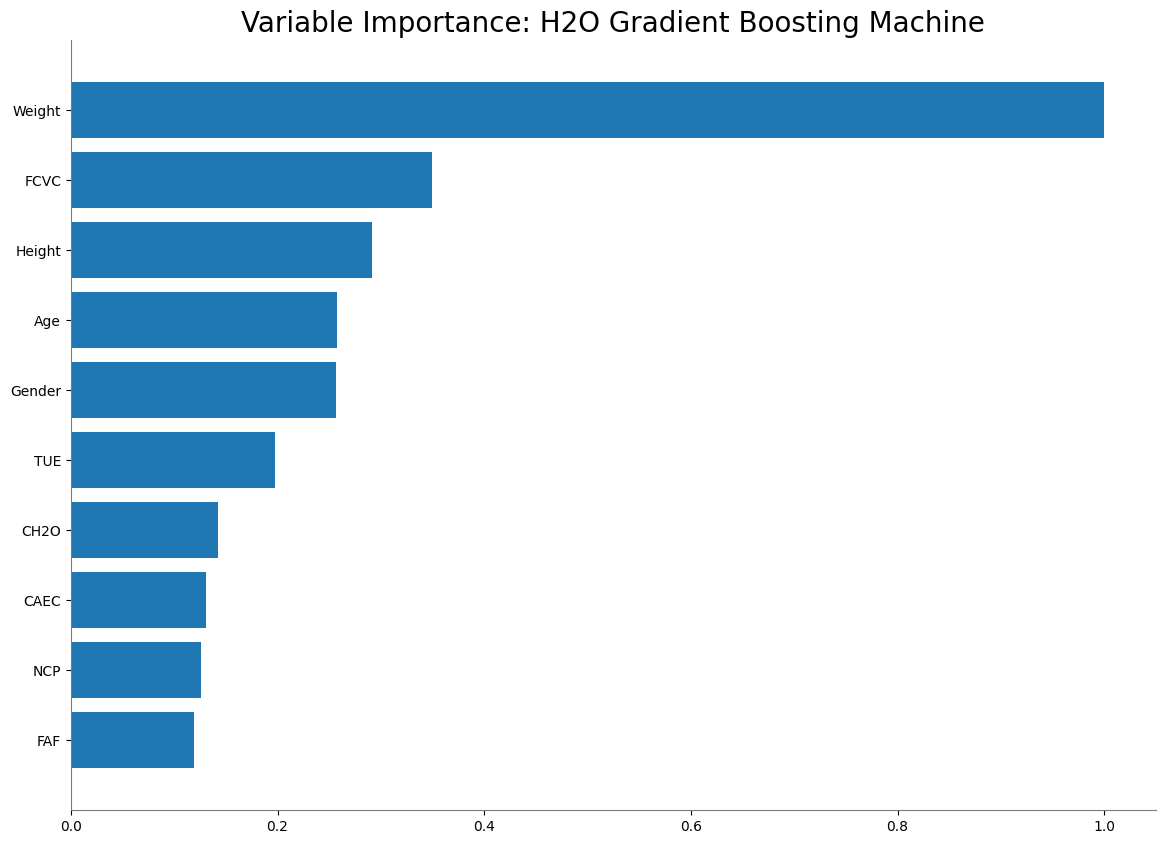

<Figure size 640x480 with 0 Axes>

In [30]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.

**Conclusion**

*Evaluation:*

 We can evaluate our model by using the above confusion matrix from it we can say that the error and rate of error in the cofusion matrix are significantly low suggesting that the model is working perfectly.

Also while evaluating all the model we can see that present leader model ("GBM_5_AutoML_1_20221107_231030") has the least amount of mean_per_class_error and logloss as well. Which also suggests that our model fuctions perfectly.

The model also gives the most important variables as height,weight and fcvc suggesting rents dependence on it. Also we know since the model thats involved GBM handles Overfitting finely as well.